In [1]:
import pandas as pd
df_airbnb = pd.read_csv("./data/airbnb.csv")

In [2]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [ ]:

# 1. Realizar Análisis Exploratorio de los datos
# Sobre este apartado deberá explorar los datos como se vio en clase .. aplicar métodos shape, columns, etc

import pandas as pd

df_airbnb = pd.read_csv('./data/airbnb.csv')

print("Forma del dataset (filas, columnas):")
print(df_airbnb.shape)

print("\nNombres de las columnas:")
print(df_airbnb.columns.tolist())

print("\nInformación general del dataset:")
print(df_airbnb.info())

print("\nPrimeras 5 filas del dataset:")
print(df_airbnb.head())

print("\nTipos de datos por columna:")
print(df_airbnb.dtypes)

print("\nValores nulos por columna:")
print(df_airbnb.isnull().sum())

print("\nEstadísticas descriptivas:")
print(df_airbnb.describe())

print("\nEstadísticas descriptivas para todas las columnas:")
print(df_airbnb.describe(include='all'))

print("\nTipos de propiedad únicos:")
print(df_airbnb['room_type'].unique())

print("\nBarrios únicos:")
print(df_airbnb['neighborhood'].unique())

Forma del dataset (filas, columnas):
(13232, 9)

Nombres de las columnas:
['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price']

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               13232 non-null  int64  
 1   host_id               13232 non-null  int64  
 2   room_type             13232 non-null  object 
 3   neighborhood          13232 non-null  object 
 4   reviews               13232 non-null  int64  
 5   overall_satisfaction  13222 non-null  float64
 6   accommodates          13232 non-null  int64  
 7   bedrooms              13232 non-null  float64
 8   price                 13232 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 930.5+ KB
None

Primeras 5 filas del dataset:

In [ ]:
# 2. Realizar Filtrados a Datos
# Realizar filtrados, según sea el caso.
# Nota: Para obtener el top de un conjunto de datos debemos aplicar un head(n) además de ordenar los datos

In [2]:
# Caso 1.
#Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse 
#o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos 
#habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar 
#antes aquellas con más críticas. Debemos darle 3 alternativas.

import pandas as pd

df_airbnb = pd.read_csv('./data/airbnb.csv')

filtro_alicia = df_airbnb[
    (df_airbnb['accommodates'] >= 4) &
    (df_airbnb['bedrooms'] >= 2) &
    (df_airbnb['reviews'] > 10) &
    (df_airbnb['overall_satisfaction'] > 4)
]

filtro_ordenado = filtro_alicia.sort_values(
    by=['overall_satisfaction', 'reviews'],
    ascending=[False, False]
)

top_3_opciones = filtro_ordenado.head(3)

print("Top 3 alojamientos sugeridos para Alicia:")
print(top_3_opciones)



Top 3 alojamientos sugeridos para Alicia:
     room_id  host_id        room_type       neighborhood  reviews  \
120   176153   842219  Entire home/apt       Misericórdia      438   
16     44043   192830  Entire home/apt  Santa Maria Maior      316   
140   202150   989393  Entire home/apt  Santa Maria Maior      274   

     overall_satisfaction  accommodates  bedrooms  price  
120                   5.0             4       2.0  102.0  
16                    5.0             7       3.0   80.0  
140                   5.0             4       2.0   62.0  


In [ ]:
# Caso 2
#Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana
#Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las 
#casas de Roberto y Clara son 97503 y 90387 respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

! pip install openpyxl
import pandas as pd

df_airbnb = pd.read_csv('./data/airbnb.csv')

df_roberto_clara = df_airbnb[df_airbnb['room_id'].isin([97503, 90387])]

df_roberto_clara.to_excel('roberto.xlsx', index=False)

print("Propiedades de Roberto y Clara:")
print(df_roberto_clara)

import IPython
IPython.display.FileLink('roberto.xlsx')

Propiedades de Roberto y Clara:
    room_id  host_id     room_type   neighborhood  reviews  \
41    90387   490050  Private room  Santo António      204   
48    97503   515924  Private room  Santo António       39   

    overall_satisfaction  accommodates  bedrooms  price  
41                   5.0             2       1.0   46.0  
48                   4.0             2       1.0   26.0  


/workspaces/PC5-PAYTHON/roberto.xlsx

In [ ]:
# Caso 3
#Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquel
#las que sean habitaciones compartidas (room_type == Shared room), y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

import pandas as pd

df_airbnb = pd.read_csv('./data/airbnb.csv')

df_presupuesto = df_airbnb[df_airbnb['price'] <= 50]

# Grupo A: Shared room (habitaciones compartidas) — ordenadas por puntuación
df_shared = df_presupuesto[df_presupuesto['room_type'] == 'Shared room']
df_shared = df_shared.sort_values(by='overall_satisfaction', ascending=False)

# Grupo B: Otras propiedades (private o entire)
df_otros = df_presupuesto[df_presupuesto['room_type'] != 'Shared room']
df_otros = df_otros.sort_values(by='price')  # orden por precio ascendente

df_diana = pd.concat([df_shared, df_otros], ignore_index=True)

top_10_diana = df_diana.head(10)

print("Top 10 alojamientos sugeridos para Diana:")
print(top_10_diana[['room_id', 'room_type', 'price', 'overall_satisfaction', 'neighborhood']])

Top 10 alojamientos sugeridos para Diana:
    room_id    room_type  price  overall_satisfaction    neighborhood
0   5725814  Shared room   21.0                   5.0    Misericórdia
1   5803348  Shared room   20.0                   5.0    Misericórdia
2   2382263  Shared room   31.0                   5.0     São Vicente
3  11427995  Shared room   18.0                   5.0    Misericórdia
4  11523225  Shared room   23.0                   5.0  Avenidas Novas
5  17497074  Shared room   18.0                   5.0         Arroios
6  17096373  Shared room   20.0                   5.0         Areeiro
7  17096560  Shared room   16.0                   5.0         Areeiro
8  14719962  Shared room   13.0                   5.0  Avenidas Novas
9  14933182  Shared room   11.0                   5.0   Santo António


In [ ]:
# 3. Realizar Agrupamientos de Datos
# Según su criterio, aplicar 2 tipos de agrupamientos a los datos brindados.
# Opcional, averiguar como realizar el gráfico de los 2 agrupamientos de los datos realizados. Se podría emplear librerias como mathplot y searbon ... ayudarse de chatgtp, etc

In [1]:
import pandas as pd

df_airbnb = pd.read_csv('./data/airbnb.csv')

# Agrupamiento 1
precio_promedio_por_tipo = df_airbnb.groupby('room_type')['price'].mean().reset_index()
precio_promedio_por_tipo = precio_promedio_por_tipo.sort_values(by='price', ascending=False)

print("🔹 Precio promedio por tipo de habitación:")
print(precio_promedio_por_tipo)

# Agrupamiento 2
agrupamiento_barrio = df_airbnb.groupby('neighborhood').agg({
    'room_id': 'count',  # cantidad de alojamientos
    'overall_satisfaction': 'mean'  # puntuación media
}).reset_index()

agrupamiento_barrio.columns = ['neighborhood', 'n_alojamientos', 'satisfaccion_promedio']
agrupamiento_barrio = agrupamiento_barrio.sort_values(by='n_alojamientos', ascending=False)

print("\n🔹 Número de alojamientos y puntuación media por barrio:")
print(agrupamiento_barrio)

🔹 Precio promedio por tipo de habitación:
         room_type       price
0  Entire home/apt  101.338181
1     Private room   45.629967
2      Shared room   34.397661

🔹 Número de alojamientos y puntuación media por barrio:
               neighborhood  n_alojamientos  satisfaccion_promedio
20        Santa Maria Maior            2798               3.732392
15             Misericórdia            2402               3.695035
4                   Arroios            1664               3.057797
21            Santo António            1105               3.347373
23              São Vicente            1041               3.561479
12                  Estrela             803               3.422167
5            Avenidas Novas             566               2.315371
18          Penha de França             407               2.800983
9          Campo de Ourique             319               2.996865
3                   Areeiro             280               2.360714
7                     Belém             

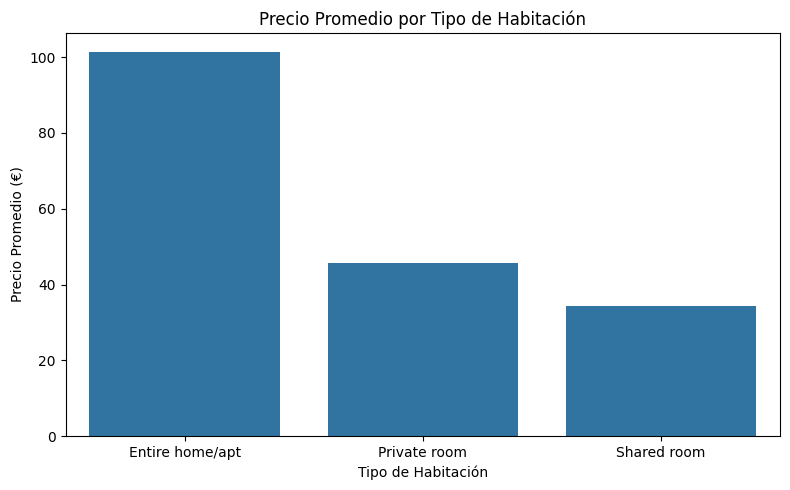

/tmp/ipykernel_11680/1894163265.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_barrios, x='n_alojamientos', y='neighborhood', palette='viridis')


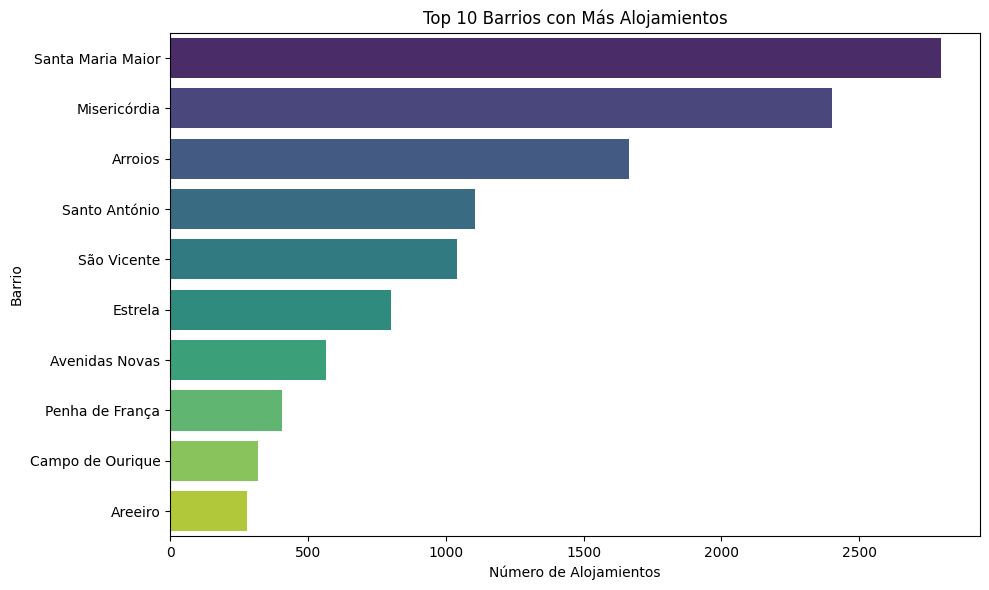

In [2]:

! pip install matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df_airbnb = pd.read_csv('./data/airbnb.csv')

# ===============================
# Agrupamiento 1: Precio promedio por tipo de habitación
# ===============================
precio_promedio = df_airbnb.groupby('room_type')['price'].mean().reset_index()
precio_promedio = precio_promedio.sort_values(by='price', ascending=False)

# Gráfico 1: Precio promedio por tipo de habitación
plt.figure(figsize=(8, 5))
sns.barplot(data=precio_promedio, x='room_type', y='price')
plt.title('Precio Promedio por Tipo de Habitación')
plt.ylabel('Precio Promedio (€)')
plt.xlabel('Tipo de Habitación')
plt.tight_layout()
plt.show()

# ===============================
# Agrupamiento 2: Cantidad de alojamientos por barrio (Top 10)
# ===============================
agrupamiento_barrio = df_airbnb.groupby('neighborhood').agg({
    'room_id': 'count',
    'overall_satisfaction': 'mean'
}).reset_index()

agrupamiento_barrio.columns = ['neighborhood', 'n_alojamientos', 'satisfaccion_promedio']
top10_barrios = agrupamiento_barrio.sort_values(by='n_alojamientos', ascending=False).head(10)

# Gráfico 2: Número de alojamientos por barrio (Top 10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_barrios, x='n_alojamientos', y='neighborhood', palette='viridis')
plt.title('Top 10 Barrios con Más Alojamientos')
plt.xlabel('Número de Alojamientos')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()